# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     - ----------------------------------- 30.7/675.6 kB 217.9 kB/s eta 0:00:03
     --- --------------------------------- 61.4/675.6 kB 297.7 kB/s eta 0:00:03
     ------ ----------------------------- 122.9/675.6 kB 514.3 kB/s eta 0:00:02
     --------------- ---------------------- 276.5/675.6 kB 1.0 MB/s eta 0:00:01
     ------------------------ ------------- 440.3/675.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#https://api.openweathermap.org/data/2.5/weather?appid=5f44312c8e94b0eb626878e353bc4672&units=metric&q=durango
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
   
    query_url = f"{url}appid={weather_api_key}&units=metric&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(query_url + city)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    #time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | seogwipo
City not found. Skipping...
Processing Record 6 of Set 1 | parauapebas
Processing Record 7 of Set 1 | qorveh
Processing Record 8 of Set 1 | caleta de carquin
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | chaohu
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | bikin
Processing Record 14 of Set 1 | gamba
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | tucuma
Processing Record 21 of Set 1 | peterhead


In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,2.91,87,75,2.57,SJ,1731385859
1,atafu village,-8.5421,-172.5159,28.74,72,21,5.94,TK,1731385894
2,port-aux-francais,-49.3500,70.2167,5.18,93,100,9.63,TF,1731385894
3,puerto ayora,-0.7393,-90.3518,21.42,87,45,1.79,EC,1731385894
4,parauapebas,-6.0675,-49.9022,21.96,99,98,0.73,BR,1731385894


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,2.91,87,75,2.57,SJ,1731385859
1,atafu village,-8.5421,-172.5159,28.74,72,21,5.94,TK,1731385894
2,port-aux-francais,-49.3500,70.2167,5.18,93,100,9.63,TF,1731385894
3,puerto ayora,-0.7393,-90.3518,21.42,87,45,1.79,EC,1731385894
4,parauapebas,-6.0675,-49.9022,21.96,99,98,0.73,BR,1731385894


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

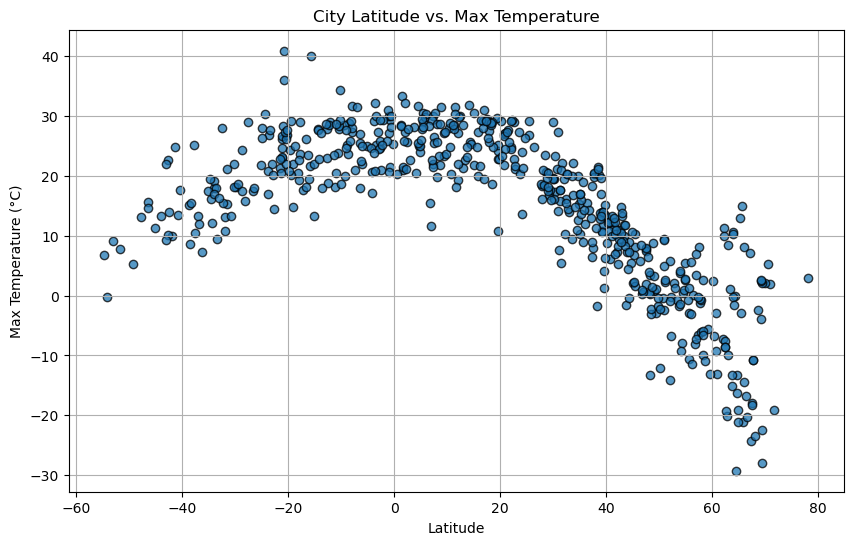

In [23]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Añadir propiedades al gráfico
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Guardar la figura
plt.savefig("Fig1.png")

# Mostrar el gráfico
plt.show()

#### Latitude Vs. Humidity

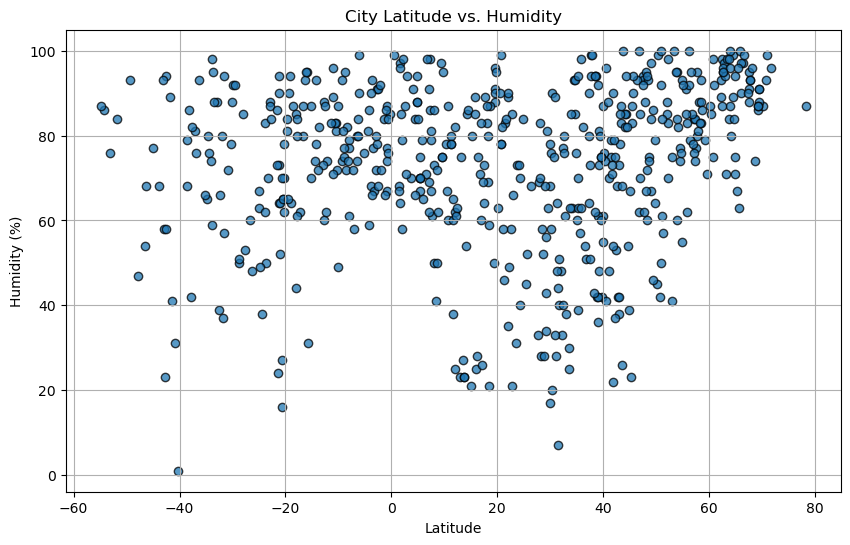

In [25]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

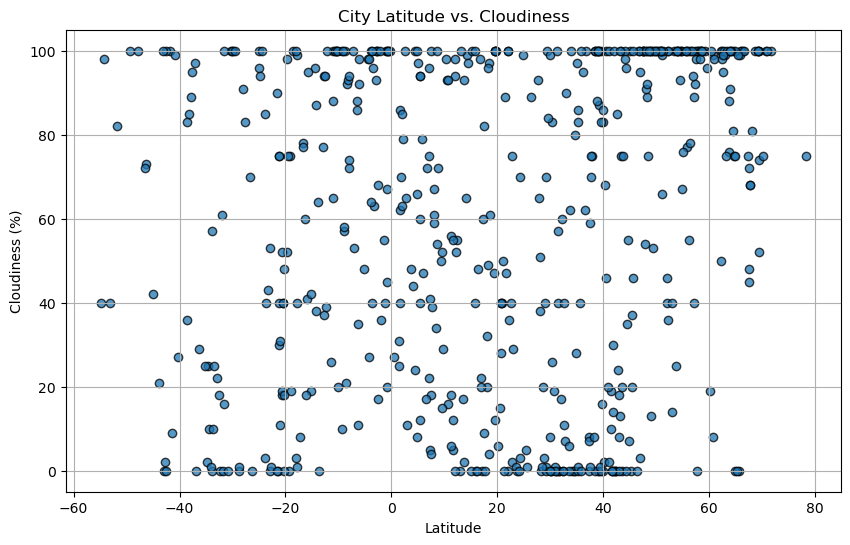

In [27]:

# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

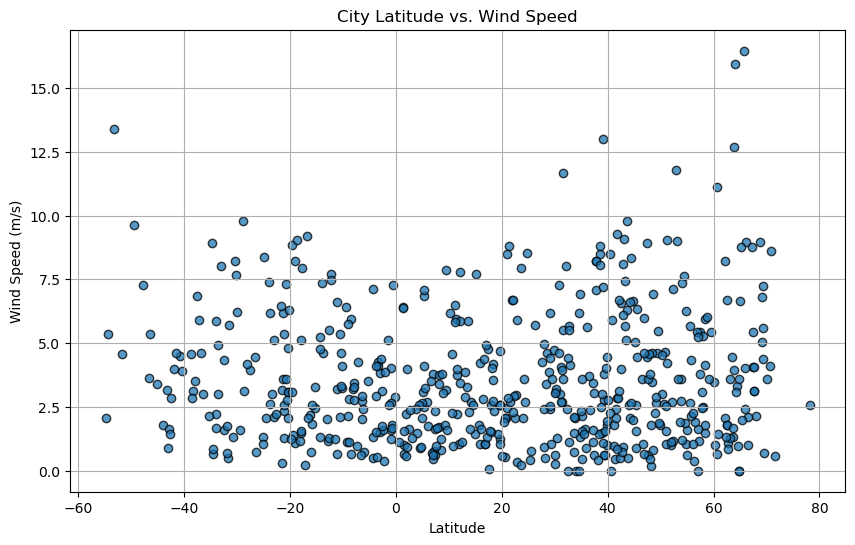

In [31]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression using scipy's linregress function
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Calculate the regression line
    regression_line = slope * x_data + intercept
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='blue', edgecolor='black', alpha=0.75, label="Data Points")
    plt.plot(x_data, regression_line, color='red', label="Regression Line")
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    
    # Display the equation and R-squared value
    plt.text(0.05, 0.95, f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}", 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    # Show the plot
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,2.91,87,75,2.57,SJ,1731385859
5,qorveh,35.1664,47.8045,10.35,70,83,2.14,IR,1731385895
8,ribeira grande,38.5167,-28.7000,21.54,94,100,8.49,PT,1731385895
9,chaohu,31.6000,117.8667,22.09,40,0,5.50,CN,1731385895
11,bikin,46.8161,134.2600,0.29,62,100,5.97,RU,1731385895


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,28.74,72,21,5.94,TK,1731385894
2,port-aux-francais,-49.3500,70.2167,5.18,93,100,9.63,TF,1731385894
3,puerto ayora,-0.7393,-90.3518,21.42,87,45,1.79,EC,1731385894
4,parauapebas,-6.0675,-49.9022,21.96,99,98,0.73,BR,1731385894
6,caleta de carquin,-11.0925,-77.6267,18.17,89,100,3.22,PE,1731385895


###  Temperature vs. Latitude Linear Regression Plot

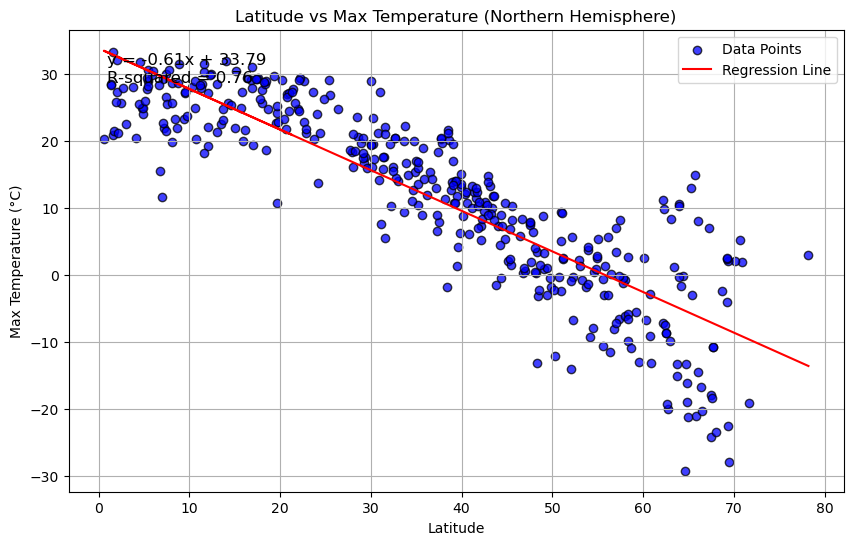

In [39]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                              "Latitude", "Max Temperature (°C)", 
                              "Latitude vs Max Temperature (Northern Hemisphere)")

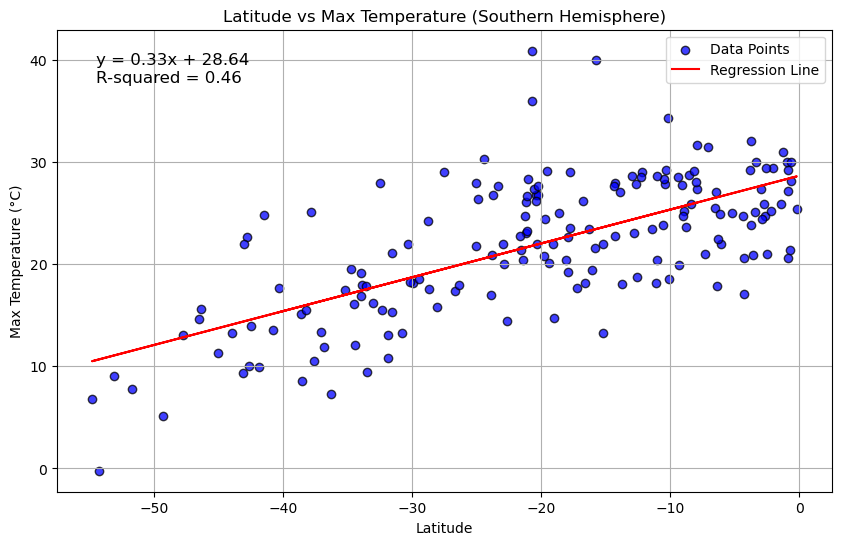

In [41]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                              "Latitude", "Max Temperature (°C)", 
                              "Latitude vs Max Temperature (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

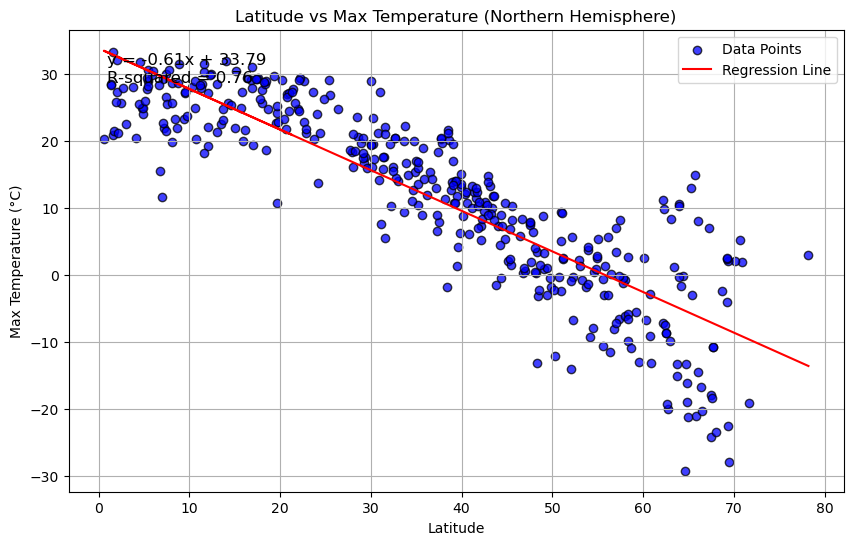

In [43]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                              "Latitude", "Max Temperature (°C)", 
                              "Latitude vs Max Temperature (Northern Hemisphere)")

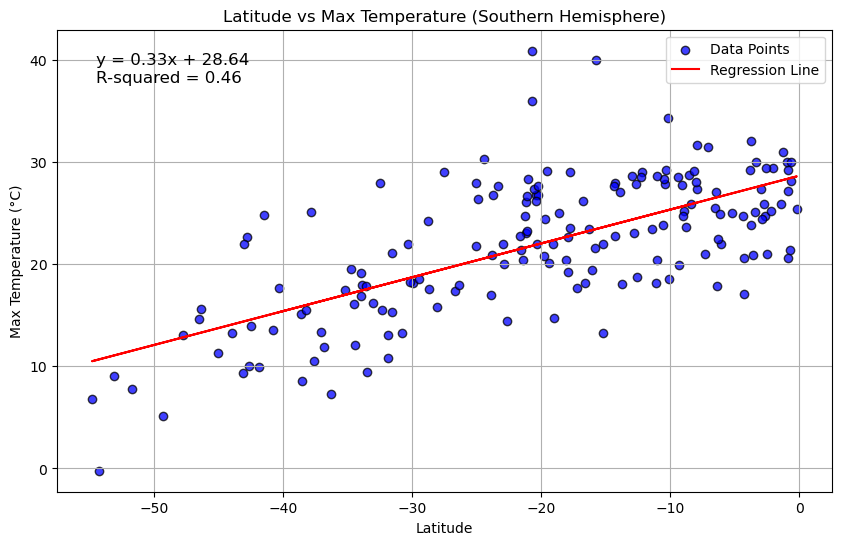

In [45]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                              "Latitude", "Max Temperature (°C)", 
                              "Latitude vs Max Temperature (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

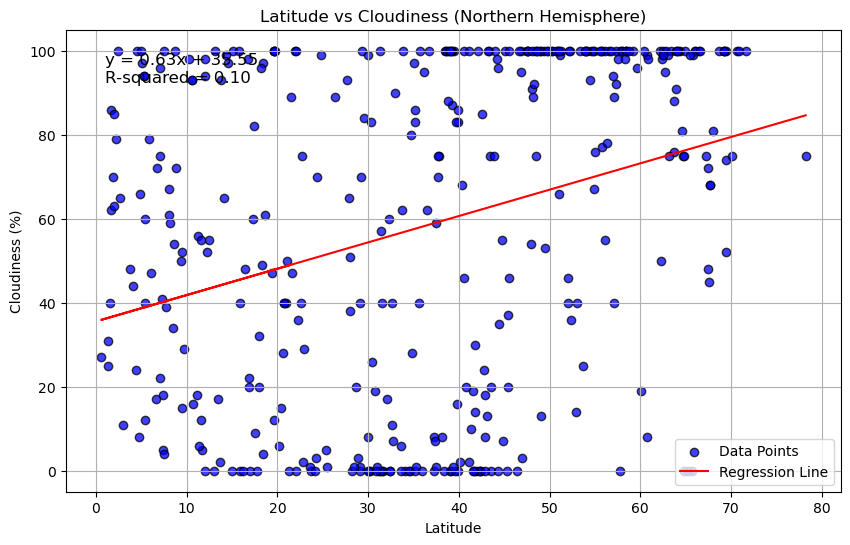

In [47]:
# Northern Hemisphere
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                              "Latitude", "Cloudiness (%)", 
                              "Latitude vs Cloudiness (Northern Hemisphere)")

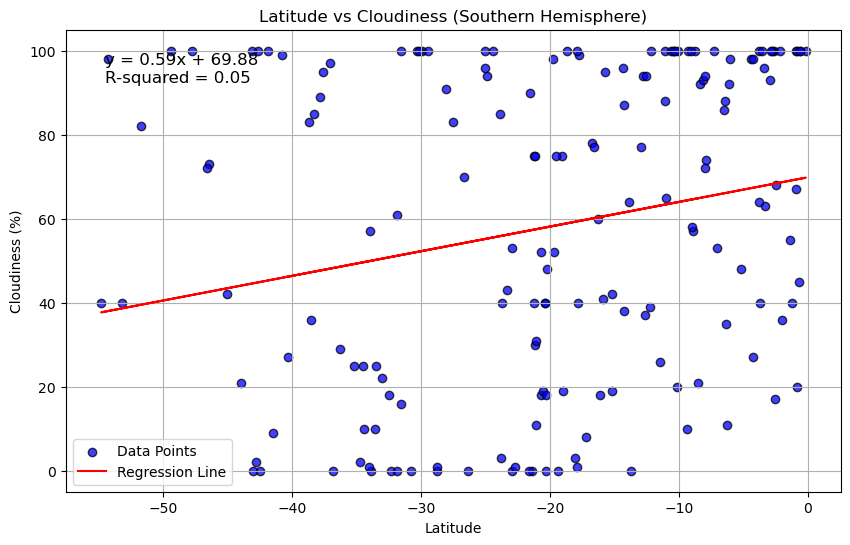

In [49]:
# Southern Hemisphere
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                              "Latitude", "Cloudiness (%)", 
                              "Latitude vs Cloudiness (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

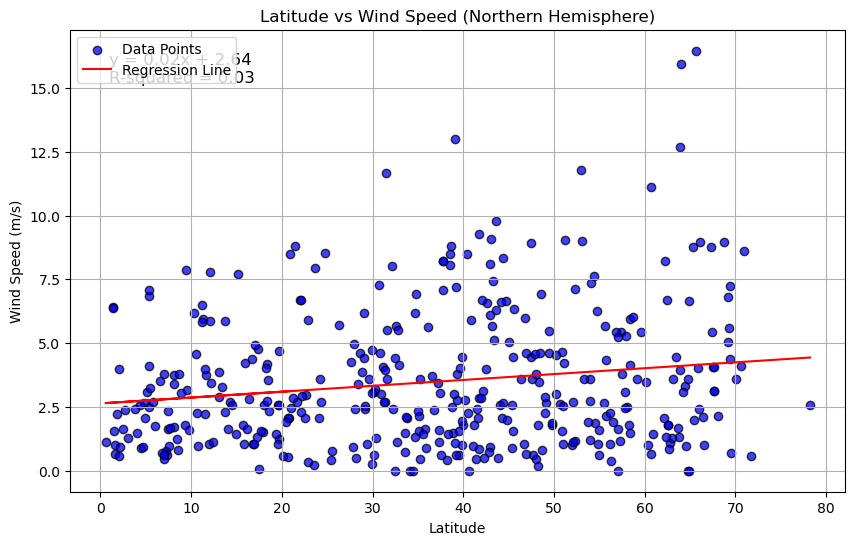

In [51]:
# Northern Hemisphere
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Llamar a la función para crear el gráfico de regresión lineal para la relación Wind Speed vs. Latitude en el Hemisferio Norte
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                              "Latitude", "Wind Speed (m/s)", 
                              "Latitude vs Wind Speed (Northern Hemisphere)")

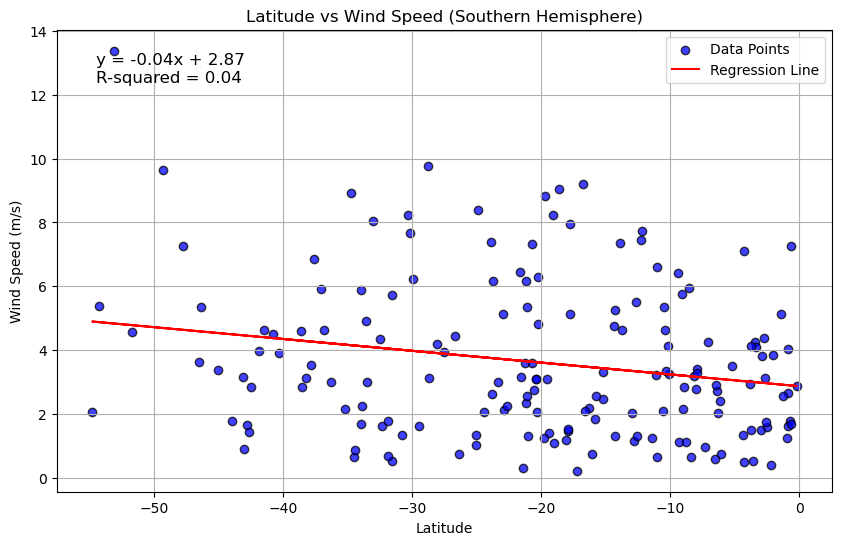

In [53]:
# Southern Hemisphere
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Llamar a la función para crear el gráfico de regresión lineal para la relación Wind Speed vs. Latitude en el Hemisferio Sur
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                              "Latitude", "Wind Speed (m/s)", 
                              "Latitude vs Wind Speed (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE